# Загрузка и предварительная обработка данных

Для начала загрузим данные и посмотрим на них:

In [1]:
from pandas import read_csv, DataFrame
import statsmodels as sm
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
import ml_metrics as metrics
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy.stats as scs
from scipy.optimize import minimize

import numpy as np
%pylab inline
import matplotlib.pyplot as plt
import warnings
import itertools

Populating the interactive namespace from numpy and matplotlib


In [2]:
dataset = pd.read_excel('C:/Users/DariaMishina/ML Daria/BST_DataSet.xlsx')

In [3]:
dataset.rename(columns={'Unnamed: 0': 'Дата'}, inplace=True)

In [4]:
dataset = dataset.set_index(pd.DatetimeIndex(dataset['Дата']))
dataset.drop(['Дата'], axis=1, inplace=True)

In [6]:
dataset.rename(columns={'Прирост вкладов физических лиц в рублях (млн руб)': 'target'}, inplace=True)

In [7]:
targ = dataset.target
targ.head()

Дата
2011-01-01    -79049.0
2011-02-01    180475.0
2011-03-01    106845.0
2011-04-01    224890.0
2011-05-01     45856.0
Name: target, dtype: float64

In [8]:
targ = targ[:72]

В итоге получили временной ряд, проанализируем его

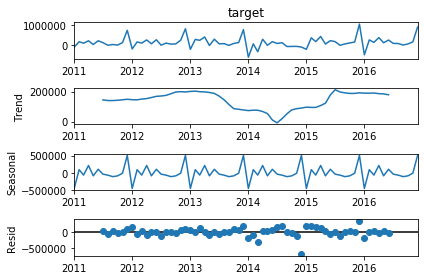

In [12]:
# применяем seasonal_decompose
# эта функция разложит ряд на трендовую, сезонную и шумовую составляющие
decomposition = seasonal_decompose(targ, model='additive') 
decomposition.plot()
pyplot.show() # любуемся результатом

In [13]:
trend_part = decomposition.trend # отдельно трендовая составляющаяя
seasonal_part = decomposition.seasonal # отдельно сезонная составляющаяя
residual_part = decomposition.resid # отдельно шум: то, что осталось

In [14]:
#Сколько элементов содержит шумовая часть
len(residual_part)

72

In [15]:
# посмотрим повнимательнее на остатки в начале ряда
residual_part.head()

Дата
2011-01-01   NaN
2011-02-01   NaN
2011-03-01   NaN
2011-04-01   NaN
2011-05-01   NaN
Name: resid, dtype: float64

In [16]:
# посмотрим повнимательнее на остатки в конце ряда
residual_part.tail()

Дата
2016-08-01   NaN
2016-09-01   NaN
2016-10-01   NaN
2016-11-01   NaN
2016-12-01   NaN
Name: resid, dtype: float64

In [17]:
# в конце и в начале стоят значения NaN. Это связано с особенностями алгоритма seasonal_decompose
# если мы хотим далее анализировать остатки, необходимо избавиться от этих некорректных значений
residual_part = residual_part.dropna()
residual_part.head()

Дата
2011-07-01    26755.496528
2011-08-01   -63702.936806
2011-09-01    15388.296528
2011-10-01   -37782.020139
2011-11-01     3068.929861
Name: resid, dtype: float64

In [18]:
len(residual_part)

60

In [19]:
#Сколько элементов содержит сезонная часть
len(seasonal_part)

72

In [20]:
seasonal_part.head()

Дата
2011-01-01   -455740.571528
2011-02-01     92475.928472
2011-03-01    -64919.046528
2011-04-01    214321.103472
2011-05-01    -86649.704861
Name: seasonal, dtype: float64

In [21]:
seasonal_part.tail()

Дата
2016-08-01    -66840.729861
2016-09-01   -110495.629861
2016-10-01    -87587.521528
2016-11-01    -10984.304861
2016-12-01    509765.528472
Name: seasonal, dtype: float64

In [23]:
seasonal_part.value_counts()

 509765.528472    6
-86649.704861     6
-66840.729861     6
-110495.629861    6
 214321.103472    6
-87587.521528     6
-10984.304861     6
-455740.571528    6
-64919.046528     6
 104559.278472    6
-37904.329861     6
 92475.928472     6
Name: seasonal, dtype: int64

In [24]:
seasonal_part = seasonal_part.dropna()

In [25]:
len(seasonal_part)

72